# Housing Prices Prediction (EDA)

### SQLite3 convert .db file to .csv file
#### Convert a .db file and outputs to a .csv file. CSV file name is based on the table names in the .db file.
#### there are also some automated .db to .csv conversion site could save time "rebasedata.com/convert-sqlite-to-csv-online"

In [1]:
import sqlite3
import os.path
import csv
from os import path

#only works if this python file is in the same directory as the .db file
tables = []
index = 0

database = input("Enter an existing .db file: ") # user input a db file
if(path.exists(str(database)+".db")):
	conn = sqlite3.connect(str(database)+".db") # connects to the database
	c = conn.cursor() 
	c.execute('SELECT name from sqlite_master where type = "table"')
	tableName = c.fetchall() # grabs all table names
	for name in tableName:
		tables.append(name[0])
	while(index != len(tableName)):
		attributes = []
		c.execute("SELECT * FROM " + str(tables[index]) + ";")
		rows = c.fetchall() # grabs all of the tuples
		columns = c.description # grabs all of the attributes
		for j in range(len(columns)): # gets the attribute names
			attributes.append(str(columns[j][0])) # this is how to get all of the attributes

		with open(str(tables[index])+".csv","w",newline = "", encoding = 'utf-8') as attrFile: # encoding utf-8 used for special characters
			attrWrite = csv.writer(attrFile, delimiter = ',')
			attrWrite.writerows([attributes])
		attrFile.close()
		for row in rows: #this is how to get the tuple values
			values = []
			for i in range(len(row)):
				# print(str(row[i]))
				values.append(str(row[i])) # each tuple value is appended 

			with open(str(tables[index])+'.csv',"a",newline = "", encoding = 'utf=8') as valFile: # encoding utf-8 used for special characters
				valWrite = csv.writer(valFile, delimiter = ',')
				valWrite.writerows([values]) # values must be inserted into a list
			valFile.close()
		index += 1
	c.close()
	conn.close()
	print("Success")
else:
	print("This file does not exist in the current directory") # when the db file does not exist

Enter an existing .db file: C:\Users\donte\Desktop\AIAP Test\data\New folder\home_sales
Success


### EDA Approach:

#### (1) Overview Checking on Data Structure & Visusal Inspection both on excel and python (i.e. identify missing NaN, format 
#### varied, upper lower case on letter etc) & understanding the business case thus the relevant features
#### (2) Review each features, whether Transformation needed (i.e. data type change, encoding on categrical features etc)
#### (3) Review Statistics & carry Feature Engineering (i.e. Scaling, Treating Outliers etc)
#### (4) Save a copy of the finalised EDA for feeder Pipeline for Module1-Regression Models & Module2-Classification Models

# (1) Overview Checking on Data Structure & Visusal Inspection

In [2]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\donte\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load Dataset
url="C:\\Users\\donte\\Desktop\\AIAP Test\\data\\home_sales-formetdate.csv"
df = pd.read_csv(url)
df.head(15) 


,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980,13/10/2014,221900,3,1,1,0,0,fair,10,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6774848,12/9/2014,538000,3,2.25,2,0,0,fair,7,400,1951,1991,98125,47.721,-122.319,1690,7639
2,6999329,25/2/2015,180000,2,1,1,0,0,fair,8,0,1933,0,98028,47.7379,-122.233,2720,8062
3,7773052,12/9/2014,604000,4,3,1,0,0,excellent,6,910,1965,0,98136,47.5208,-122.393,1360,5000
4,7760818,18/2/2015,510000,3,2,1,0,0,fair,6,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7659918,5/12/2014,1225000,4,4.5,1,0,0,fair,8,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,8057033,27/6/2014,257500,3,2.25,2,0,0,FAIR,7,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7249853,15/1/2015,291850,3,1.5,1,0,0,fair,7,0,1963,0,98198,47.4095,-122.315,1650,9711
8,7906980,15/4/2015,229500,3,1,1,0,0,FAIR,7,730,1960,0,98146,47.5123,-122.337,1780,8113
9,7605289,3/12/2015,323000,3,2.5,2,0,0,fair,7,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
## visual inspection with Excel (Filter check): rows with "None", 3 cols "renovation", "waterfront", "view" had many '0's, 
## => col "date" diff format (2104 & 2015 data), "price" wide range $75k to $7.7m, "bedroom" 0 to 11, "bathroom" 0 to 8,
## => "floor" 1 to 3.5, "condition" 5 level intermix Uppercase & Lowercase, "review" 1 to 13, "basement" 0 to 4820
## => "built" 1900 to 2015, "zipcode" 98001 to 98199, "latitude" 47.1559 to 47.7776, "longtitude" -122.519 to -121.315,
## => "living room" 399 to 6310, "lot size" 651 to 871200
##### will expound further with python after 1st cut visual inspect, 
##### those can instant fix like date format has been corrected before loading to python
##### EDA done with Excel (5%), Python (95%)

In [5]:
# check rows & cols
df.shape 
## show 23154 rows/records, 18 features (Y-TGT is "Price", the rest 17 is Independent Features)

(23154, 18)

In [6]:
df.dtypes
## => need convert object type to numeric for processing statisitcs, arithmetic etc (Numeric Variables), 
## => for Categorical Valuables need encoding

id                  object
date                object
price               object
bedrooms            object
bathrooms           object
floors              object
waterfront          object
view                object
condition           object
review_score        object
basement_size       object
built               object
renovation          object
zipcode             object
latitude            object
longitude           object
living_room_size    object
lot_size            object
dtype: object

In [7]:
# check missing values
df.isnull().sum()
## there are no missing values (but need fix the many rows of "None")

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
floors              0
waterfront          0
view                0
condition           0
review_score        0
basement_size       0
built               0
renovation          0
zipcode             0
latitude            0
longitude           0
living_room_size    0
lot_size            0
dtype: int64

In [8]:
# Drop the rows with "None" Object-String type, can't just dropna(); rtn drop result back to df
df=df.mask(df.eq('None')).dropna()
## => 19688 rows left, 3466 rows with 'None' dropped
df.shape

(19688, 18)

In [9]:
# 3 cols "renovation", "waterfront", "view" had many '0's, -> Drop Columns as will not be able to use this data for analysis
# Id of houses is also not useful

## validate findings "renovation" 
df['renovation'].value_counts()
## => 18834 "0"s, drop col "renovation"

0       18834
2014       82
2005       34
2013       33
2007       32
        ...  
1948        1
1944        1
1950        1
1967        1
1959        1
Name: renovation, Length: 70, dtype: int64

# (2) Review each features, whether Transformation needed

In [10]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.renovation.unique()

array(['0', '1991', '2002', '2010', '1999', '1992', '2013', '1994',
       '2005', '2008', '2003', '1984', '1954', '2014', '2011', '1974',
       '1945', '1990', '1988', '1957', '1977', '1981', '1995', '2000',
       '1998', '1970', '1989', '2004', '1986', '2009', '2007', '1987',
       '1973', '2006', '1985', '2001', '1980', '1971', '1979', '1997',
       '1969', '1948', '1983', '2015', '1978', '1968', '2012', '1963',
       '1951', '1993', '1962', '1996', '1972', '1953', '1955', '1950',
       '1982', '1940', '1976', '1946', '1975', '1958', '1964', '1959',
       '1960', '1956', '1967', '1965', '1934', '1944'], dtype=object)

In [11]:
## validate findings "waterfront" 
df['waterfront'].value_counts()
## => 19527 "0"s, drop col "waterfront"; imbalanced dataset issue

0    19527
1      161
Name: waterfront, dtype: int64

In [12]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.waterfront.unique()

array(['0', '1'], dtype=object)

In [13]:
## validate findings "view" 
df['view'].value_counts()
## 17747 "0"s, drop col "view"

0    17747
2      869
3      470
1      306
4      296
Name: view, dtype: int64

In [14]:
# check Unique Categories bef drop (as part of inpection for each of the 18 variables)
df.view.unique()

array(['0', '3', '2', '4', '1'], dtype=object)

In [15]:
# Proceed drop 4 cols "id", "renovation", "waterfront", "view"
df = df[['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'review_score', 'basement_size', 'built',
       'zipcode', 'latitude', 'longitude', 'living_room_size',
       'lot_size']]

In [16]:
# check cols dropped correctly
df.head()
## => cols "id", "renovation", "waterfront", "view" has been dropped

,date,price,bedrooms,bathrooms,floors,condition,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size
0,13/10/2014,221900,3,1,1,fair,10,0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000,3,2.25,2,fair,7,400,1951,98125,47.721,-122.319,1690,7639
2,25/2/2015,180000,2,1,1,fair,8,0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000,4,3,1,excellent,6,910,1965,98136,47.5208,-122.393,1360,5000
4,18/2/2015,510000,3,2,1,fair,6,0,1987,98074,47.6168,-122.045,1800,7503


In [17]:
# check cols dropped
df.shape
## => 18-4 cols dropped is 14

(19688, 14)

In [18]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.date.unique()

array(['13/10/2014', '12/9/2014', '25/2/2015', '18/2/2015', '5/12/2014',
       '27/6/2014', '15/1/2015', '15/4/2015', '3/12/2015', '4/3/2015',
       '27/5/2014', '10/7/2014', '24/1/2015', '31/7/2014', '29/5/2014',
       '12/5/2014', '24/4/2015', '14/5/2014', '7/3/2014', '16/5/2014',
       '20/11/2014', '11/3/2014', '26/6/2014', '12/1/2014', '24/6/2014',
       '3/2/2015', '11/10/2014', '12/3/2014', '13/6/2014', '28/5/2014',
       '30/12/2014', '13/2/2015', '20/6/2014', '8/11/2014', '28/10/2014',
       '29/7/2014', '18/7/2014', '25/3/2015', '28/4/2015', '3/11/2015',
       '16/9/2014', '17/2/2015', '31/12/2014', '2/5/2015', '3/3/2015',
       '19/8/2014', '4/7/2015', '27/8/2014', '23/2/2015', '12/10/2014',
       '28/8/2014', '6/3/2014', '9/9/2014', '10/9/2014', '25/8/2014',
       '9/12/2014', '1/5/2015', '6/10/2014', '7/10/2014', '16/3/2015',
       '11/5/2014', '20/4/2015', '6/9/2014', '22/12/2014', '28/1/2015',
       '6/2/2014', '14/11/2014', '19/5/2014', '9/4/2014', '25/7/20

In [19]:
df['date'].value_counts()
# interpret in this manner: 132 hse sales on this date 23/6/2014

23/6/2014     132
7/8/2014      120
26/6/2014     120
25/6/2014     120
27/4/2015     118
             ... 
5/10/2015       1
30/11/2014      1
1/10/2015       1
15/5/2015       1
12/7/2014       1
Name: date, Length: 373, dtype: int64

In [20]:
# From description we can see that "date" is a object data type, we have to convert this datatype into timestamp so as to 
# use this column properly for prediction
# For this we require pandas to_datetime to convert object data type to datetime dtype.
# **.dt.month method will extract only month of that date**\ **.dt.year method will extract only year of that date**

import datetime
df['date_str'] = df['date'].astype('datetime64[ns]') # conversion object type to timestamp
df['date_yr_sold'] = df['date_str'].dt.year # extract year for use, rtn to create new col
df.head()

,date,price,bedrooms,bathrooms,floors,condition,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size,date_str,date_yr_sold
0,13/10/2014,221900,3,1,1,fair,10,0,1955,98178,47.5112,-122.257,1340,5650,2014-10-13,2014
1,12/9/2014,538000,3,2.25,2,fair,7,400,1951,98125,47.721,-122.319,1690,7639,2014-12-09,2014
2,25/2/2015,180000,2,1,1,fair,8,0,1933,98028,47.7379,-122.233,2720,8062,2015-02-25,2015
3,12/9/2014,604000,4,3,1,excellent,6,910,1965,98136,47.5208,-122.393,1360,5000,2014-12-09,2014
4,18/2/2015,510000,3,2,1,fair,6,0,1987,98074,47.6168,-122.045,1800,7503,2015-02-18,2015


In [21]:
# don't need "date" & "date_str" anymore, drop them, will use "date_yr_sold" for prediction
df.drop("date",axis=1,inplace=True) #axis=1 is col, axis=0 is row
df.drop("date_str",axis=1,inplace=True)

#check for dropped "date_str" & newly created "date_yr_sold" for getting "house_age" later
df.head()
## => correctly done

,price,bedrooms,bathrooms,floors,condition,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size,date_yr_sold
0,221900,3,1,1,fair,10,0,1955,98178,47.5112,-122.257,1340,5650,2014
1,538000,3,2.25,2,fair,7,400,1951,98125,47.721,-122.319,1690,7639,2014
2,180000,2,1,1,fair,8,0,1933,98028,47.7379,-122.233,2720,8062,2015
3,604000,4,3,1,excellent,6,910,1965,98136,47.5208,-122.393,1360,5000,2014
4,510000,3,2,1,fair,6,0,1987,98074,47.6168,-122.045,1800,7503,2015


In [22]:
df.shape
## => correct 14 -1("date_str") +1("date_yr_sold")

(19688, 14)

In [23]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.price.unique()

array(['221900', '538000', '180000', ..., '839990', '3640900', '619100'],
      dtype=object)

In [24]:
df['price'].value_counts()
# interpret in this manner: 150 Hse sold at $45k

450000     150
425000     146
350000     143
550000     141
400000     136
          ... 
166950       1
829950       1
82500        1
4208000      1
469775       1
Name: price, Length: 3684, dtype: int64

In [25]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.bedrooms.unique()

array(['3', '2', '4', '5', '6', '1', '7', '0', '8', '9', '11', '10'],
      dtype=object)

In [26]:
df['bedrooms'].value_counts()
# interpret in this manner: 8944 3-bedrooms Hse sold

3     8944
4     6304
2     2492
5     1464
6      236
1      180
7       39
0       11
8       10
9        4
10       3
11       1
Name: bedrooms, dtype: int64

In [27]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.bathrooms.unique()

array(['1', '2.25', '3', '2', '4.5', '1.5', '2.5', '1.75', '2.75', '3.25',
       '4', '3.5', '0.75', '4.75', '5', '4.25', '3.75', '0', '5.25', '6',
       '1.25', '5.5', '6.75', '5.75', '8', '7.5', '7.75', '0.5', '6.25',
       '6.5'], dtype=object)

In [28]:
df['bathrooms'].value_counts()
# interpret in this manner: 2.5 bathrooms hse sales is highest at 4868

2.5     4868
1       3503
1.75    2757
2.25    1887
2       1772
1.5     1319
2.75    1094
3        681
3.5      667
3.25     548
3.75     142
4        119
4.5       88
4.25      76
0.75      67
4.75      18
5         17
5.25      13
0         10
5.5       10
1.25       8
6          6
5.75       5
0.5        3
6.75       2
6.25       2
6.5        2
8          2
7.5        1
7.75       1
Name: bathrooms, dtype: int64

In [29]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.floors.unique()

array(['1', '2', '1.5', '3', '2.5', '3.5'], dtype=object)

In [30]:
df['floors'].value_counts()
# interpret in this manner: hse on floor 1 sales highest at 9713 units

1      9713
2      7512
1.5    1747
3       565
2.5     144
3.5       7
Name: floors, dtype: int64

In [31]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.condition.unique()

array(['fair', 'excellent', 'FAIR', 'good', 'TERRIBLE', 'poor', 'GOOD',
       'EXCELLENT', 'terrible', 'POOR'], dtype=object)

In [32]:
df['condition'].value_counts()
# "condition" 5 levels intermix Uppercase & Lowercase

fair         11789
good          4743
excellent     1396
FAIR           997
GOOD           438
poor           140
EXCELLENT      140
terrible        29
POOR            14
TERRIBLE         2
Name: condition, dtype: int64

In [33]:
# change to common lowercase for better grouping under new col "condition1"
df['condition1'] = df['condition'].str.lower()
df['condition1'].value_counts(ascending=True)


terrible        31
poor           154
excellent     1536
good          5181
fair         12786
Name: condition1, dtype: int64

In [34]:
# don't need he previous col "condition" anymore, drop it
df.drop("condition",axis=1,inplace=True) #axis=1 is col, axis=0 is row

#check for dropped "condition" & newly created "condition1" 
df.head()
## => correctly done

,price,bedrooms,bathrooms,floors,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size,date_yr_sold,condition1
0,221900,3,1,1,10,0,1955,98178,47.5112,-122.257,1340,5650,2014,fair
1,538000,3,2.25,2,7,400,1951,98125,47.721,-122.319,1690,7639,2014,fair
2,180000,2,1,1,8,0,1933,98028,47.7379,-122.233,2720,8062,2015,fair
3,604000,4,3,1,6,910,1965,98136,47.5208,-122.393,1360,5000,2014,excellent
4,510000,3,2,1,6,0,1987,98074,47.6168,-122.045,1800,7503,2015,fair


In [35]:
# Categorical Data need encoding for ML to process
## using Pandas Map() is more relevant here than using sklearn LabelEncoder() or One Hot Encoding, allowed us to specify the
# order of the values in our categorical feature to ensure they are in a meaningful arrangement

## create dictionary of ordinal to integer mapping
condition1 = {'terrible':1, 'poor':2, 'fair':3, 'good':4, 'excellent':5,}

# apply using map
df['condition1'] = df.condition1.map(condition1)
df['condition1'].value_counts(ascending=True)

1       31
2      154
5     1536
4     5181
3    12786
Name: condition1, dtype: int64

In [36]:
#check for dropped "condition" & newly created "condition1" 
df.head()
## => correctly done

,price,bedrooms,bathrooms,floors,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size,date_yr_sold,condition1
0,221900,3,1,1,10,0,1955,98178,47.5112,-122.257,1340,5650,2014,3
1,538000,3,2.25,2,7,400,1951,98125,47.721,-122.319,1690,7639,2014,3
2,180000,2,1,1,8,0,1933,98028,47.7379,-122.233,2720,8062,2015,3
3,604000,4,3,1,6,910,1965,98136,47.5208,-122.393,1360,5000,2014,5
4,510000,3,2,1,6,0,1987,98074,47.6168,-122.045,1800,7503,2015,3


In [37]:
df.shape
# 14 +("condition1") -("condition")

(19688, 14)

In [38]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.review_score.unique()

array(['10', '7', '8', '6', '9', '5', '11', '12', '4', '13', '1', '3'],
      dtype=object)

In [39]:
df['review_score'].value_counts()
# interpret in this manner: review score "7" is highest at 8183 times

7     8183
8     5518
9     2383
6     1859
10    1039
11     356
5      221
12      87
4       25
13      14
3        2
1        1
Name: review_score, dtype: int64

In [40]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.basement_size.unique()

array(['0', '400', '910', '1530', '730', '1700', '300', '970', '760',
       '700', '820', '780', '790', '330', '1620', '360', '588', '1510',
       '410', '990', '600', '560', '550', '500', '1040', '880', '240',
       '265', '290', '800', '1000', '1600', '840', '380', '770', '480',
       '570', '1490', '620', '1010', '1250', '1270', '120', '650', '180',
       '1130', '450', '1640', '1020', '1030', '750', '640', '1070', '490',
       '630', '2000', '390', '430', '850', '210', '1430', '1950', '440',
       '1160', '860', '580', '2060', '1820', '1180', '200', '1150',
       '1200', '680', '530', '1450', '1170', '1080', '1100', '280', '460',
       '1400', '720', '1320', '1220', '900', '420', '1580', '1380', '475',
       '690', '270', '350', '935', '710', '1370', '980', '1470', '160',
       '950', '50', '740', '1780', '1900', '340', '470', '370', '540',
       '140', '1760', '130', '610', '520', '890', '660', '1110', '150',
       '1720', '960', '810', '190', '1290', '670', '1800', '

In [41]:
df['basement_size'].value_counts()
# interpret in this manner: "0" no basement has highest hse sales at 11950, 600sqft comes 2nd at 208

0       11950
600       208
500       206
700       190
800       185
        ...  
1920        1
2240        1
1810        1
1245        1
2120        1
Name: basement_size, Length: 302, dtype: int64

In [42]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.built.unique()

array(['1955', '1951', '1933', '1965', '1987', '2001', '1995', '1963',
       '1960', '2003', '1942', '1977', '1900', '1979', '1994', '1916',
       '1921', '1969', '1947', '1985', '1941', '1915', '1909', '1948',
       '2005', '1929', '1981', '1930', '1904', '1996', '1984', '1922',
       '1959', '1966', '1953', '1950', '1927', '2008', '1968', '1991',
       '1954', '1989', '1973', '1972', '1986', '1956', '1992', '1964',
       '1952', '1925', '1961', '2006', '1939', '1946', '1967', '1910',
       '1983', '1978', '1905', '1971', '2010', '1924', '1990', '1914',
       '1926', '2004', '2014', '1962', '1923', '2007', '2000', '1975',
       '1976', '1949', '1999', '1980', '1988', '1993', '1901', '1920',
       '1997', '1943', '1957', '1940', '1918', '1928', '1974', '1911',
       '1936', '1937', '1982', '1908', '1931', '2002', '1998', '2013',
       '1907', '1958', '2012', '1912', '2011', '1917', '1932', '1944',
       '1902', '2009', '1903', '1970', '2015', '1934', '1938', '1913',
      

In [43]:
df['built'].value_counts()
# interpret in this manner: hse built in 2014 has the highest sales, followed by 2006, 2005...

2014    505
2006    422
2005    420
2007    384
1977    384
       ... 
1933     31
1901     26
1902     24
1935     22
1934     19
Name: built, Length: 116, dtype: int64

In [44]:
# There isn't any use knowing "Built" Yr, we need create new derived feature that are more useful i.e. “House Age” by using
# “date_year” (date year of sale) minus “built" year

In [45]:
# need convert "built" object type to numeric for arithmetic
df["built"] = pd.to_numeric(df["built"])

In [46]:
df["house_age"] = df["date_yr_sold"] - df["built"]
df.head()
## => "house age" created & correctly calculated

,price,bedrooms,bathrooms,floors,review_score,basement_size,built,zipcode,latitude,longitude,living_room_size,lot_size,date_yr_sold,condition1,house_age
0,221900,3,1,1,10,0,1955,98178,47.5112,-122.257,1340,5650,2014,3,59
1,538000,3,2.25,2,7,400,1951,98125,47.721,-122.319,1690,7639,2014,3,63
2,180000,2,1,1,8,0,1933,98028,47.7379,-122.233,2720,8062,2015,3,82
3,604000,4,3,1,6,910,1965,98136,47.5208,-122.393,1360,5000,2014,5,49
4,510000,3,2,1,6,0,1987,98074,47.6168,-122.045,1800,7503,2015,3,28


In [47]:
# Proceed drop cols "built", "date_yr_sold" as no more use, 
df = df[['price', 'bedrooms', 'bathrooms', 'floors', 'review_score', 
       'basement_size', 'zipcode', 'latitude', 'longitude',
        'living_room_size','lot_size', 'condition1','house_age']]
# check if correctly done
df.head()

,price,bedrooms,bathrooms,floors,review_score,basement_size,zipcode,latitude,longitude,living_room_size,lot_size,condition1,house_age
0,221900,3,1,1,10,0,98178,47.5112,-122.257,1340,5650,3,59
1,538000,3,2.25,2,7,400,98125,47.721,-122.319,1690,7639,3,63
2,180000,2,1,1,8,0,98028,47.7379,-122.233,2720,8062,3,82
3,604000,4,3,1,6,910,98136,47.5208,-122.393,1360,5000,5,49
4,510000,3,2,1,6,0,98074,47.6168,-122.045,1800,7503,3,28


In [48]:
df.shape
# 14 +1("house_age") -2 ("built", "date_yr_sold")

(19688, 13)

In [49]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98092', '98030', '98119',
       '98112', '98052', '98027', '98117', '98058', '98001', '98056',
       '98166', '98023', '98070', '98148', '98105', '98042', '98008',
       '98059', '98122', '98004', '98005', '98034', '98075', '98116',
       '98199', '98040', '98032', '98045', '98102', '98077', '98108',
       '98168', '98144', '98177', '98118', '98065', '98029', '98006',
       '98109', '98022', '98033', '98155', '98024', '98011', '98031',
       '98010', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

In [50]:
df['zipcode'].value_counts()
# interpret in this manner: 549 hse located at this zipcode 98103

98103    549
98038    544
98052    539
98115    536
98034    516
        ... 
98109     94
98010     89
98024     74
98148     53
98039     45
Name: zipcode, Length: 70, dtype: int64

In [51]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.latitude.unique()

array(['47.5112', '47.721', '47.7379', ..., '47.3708', '47.214', '47.389'],
      dtype=object)

In [52]:
df['latitude'].value_counts()
# interpret in this manner: 18 hses is on lat 47.5322

47.5322    18
47.6886    17
47.6727    16
47.6711    16
47.6846    16
           ..
47.3315     1
47.3048     1
47.274      1
47.2672     1
47.6047     1
Name: latitude, Length: 4900, dtype: int64

In [53]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.longitude.unique()

array(['-122.257', '-122.319', '-122.233', '-122.393', '-122.045',
       '-122.005', '-122.327', '-122.315', '-122.337', '-122.031',
       '-122.145', '-122.292', '-122.394', '-122.375', '-121.962',
       '-122.343', '-122.21', '-122.306', '-122.341', '-122.169',
       '-122.166', '-122.172', '-122.218', '-122.36', '-122.314',
       '-122.304', '-122.11', '-122.07', '-122.357', '-122.368',
       '-122.157', '-122.31', '-122.132', '-122.362', '-122.282',
       '-122.18', '-122.347', '-122.364', '-122.175', '-121.977',
       '-122.371', '-122.301', '-122.451', '-122.322', '-122.189',
       '-122.384', '-122.369', '-122.281', '-122.29', '-122.114',
       '-122.122', '-122.116', '-122.149', '-122.339', '-122.335',
       '-122.297', '-122.192', '-122.16', '-122.179', '-122.287',
       '-122.036', '-122.073', '-121.987', '-122.125', '-122.34',
       '-122.365', '-122.194', '-122.387', '-122.391', '-122.386',
       '-122.249', '-122.277', '-121.714', '-122.08', '-122.196',
     

In [54]:
df['longitude'].value_counts()
# interpret in this manner: 103 hses is on longt -122.29

-122.29     103
-122.3      103
-122.288     93
-122.291     92
-122.362     92
           ... 
-122.432      1
-121.402      1
-121.417      1
-121.907      1
-121.921      1
Name: longitude, Length: 728, dtype: int64

In [55]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.living_room_size.unique()

array(['1340', '1690', '2720', '1360', '1800', '4760', '2238', '1650',
       '1780', '2390', '2210', '1330', '1370', '2140', '1890', '1610',
       '1060', '1280', '1400', '2240', '1220', '2200', '1030', '1760',
       '1860', '1520', '2630', '2580', '1390', '1460', '2020', '1590',
       '2160', '1730', '1290', '2620', '2410', '1580', '3050', '1228',
       '970', '2680', '1190', '1990', '1410', '1480', '2730', '1950',
       '2250', '2690', '2960', '2270', '2570', '1440', '2750', '2221',
       '1010', '3530', '1640', '1510', '2420', '1940', '3240', '1680',
       '890', '1130', '1870', '1850', '1570', '2520', '1750', '2550',
       '2370', '1240', '1270', '2990', '2500', '1380', '2090', '1830',
       '1620', '1880', '2340', '1710', '2700', '3060', '2660', '1700',
       '1970', '1420', '2060', '2480', '1540', '1550', '1350', '1170',
       '2820', '1560', '2230', '2840', '1450', '1500', '3160', '1980',
       '1160', '1200', '3400', '2110', '2920', '1770', '1070', '1930',
       '

In [56]:
df['living_room_size'].value_counts()
# interpret in this manner: 190 hses has living_room_size 1440sqft

1440    190
1540    185
1560    178
1500    168
1720    159
       ... 
2478      1
1448      1
1425      1
4780      1
1638      1
Name: living_room_size, Length: 733, dtype: int64

In [57]:
# check Unique Categories (as part of inpection for each of the 18 variables)
df.lot_size.unique()

array(['5650', '7639', '8062', ..., '794', '60513', '25582'], dtype=object)

In [58]:
df['lot_size'].value_counts()
# interpret in this manner: 372 hses has lot_size 5000sqft

5000     372
4000     333
6000     256
7200     193
4800     130
        ... 
8058       1
49346      1
15909      1
24875      1
8776       1
Name: lot_size, Length: 7905, dtype: int64

In [59]:
# revised dataset; reaarange col for better viewing: 
## Tgt-Y 'price'; follow by Indept Variables x 'date_mth' till 'house_age'

df = df[['price', 'bedrooms', 'bathrooms', 'floors', 'basement_size',
       'living_room_size','lot_size', 'zipcode', 'latitude', 'longitude', 
       'review_score', 'condition1','house_age']]
# check if correctly done
df.head()

,price,bedrooms,bathrooms,floors,basement_size,living_room_size,lot_size,zipcode,latitude,longitude,review_score,condition1,house_age
0,221900,3,1,1,0,1340,5650,98178,47.5112,-122.257,10,3,59
1,538000,3,2.25,2,400,1690,7639,98125,47.721,-122.319,7,3,63
2,180000,2,1,1,0,2720,8062,98028,47.7379,-122.233,8,3,82
3,604000,4,3,1,910,1360,5000,98136,47.5208,-122.393,6,5,49
4,510000,3,2,1,0,1800,7503,98074,47.6168,-122.045,6,3,28


# (3) Review Statistics & carry Feature Engineering

In [60]:
# need convert object type to numeric for processing statisitcs, arithmetic etc (Numeric Variables), 
df["bedrooms"] = pd.to_numeric(df["bedrooms"])
df["bathrooms"] = pd.to_numeric(df["bathrooms"])
df["floors"] = pd.to_numeric(df["floors"])
df["basement_size"] = pd.to_numeric(df["basement_size"])
df["living_room_size"] = pd.to_numeric(df["living_room_size"])
df["lot_size"] = pd.to_numeric(df["lot_size"])
df["zipcode"] = pd.to_numeric(df["zipcode"])
df["latitude"] = pd.to_numeric(df["latitude"])
df["longitude"] = pd.to_numeric(df["longitude"])
df["review_score"] = pd.to_numeric(df["review_score"])
df["condition1"] = pd.to_numeric(df["condition1"])
df["house_age"] = pd.to_numeric(df["house_age"])
df["price"] = pd.to_numeric(df["price"])

In [61]:
df.describe()

# => Basic Check to ensure data make sense:
# => Count, is consistent across all features 19688, date_mth Max is 12 (mths) etc
# => Sales Price-1: Mean is slightly higher than Median, Distribution skewed to the right; could be some extreme outlier 
# => Sales Price-2: StdDev is quite high, data points are spread out over wide range of values
# => Sales Price-3: Highest is $7.7m, Mean ($5.4x100,000 = $540k), Lowest is (7.5x10,0000 = $75k),

,price,bedrooms,bathrooms,floors,basement_size,living_room_size,lot_size,zipcode,latitude,longitude,review_score,condition1,house_age
count,1.968800e+04,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000
mean,5.434626e+05,3.371495,2.115553,1.495175,292.394453,1988.706217,12846.990807,98078.000762,47.561199,-122.213786,7.657964,3.408218,43.353210
std,3.733997e+05,0.904515,0.771053,0.540391,444.848677,686.733246,27567.625277,53.452090,0.138121,0.140946,1.177340,0.650172,29.382085
min,7.500000e+04,0.000000,0.000000,1.000000,0.000000,399.000000,651.000000,98001.000000,47.155900,-122.515000,1.000000,1.000000,-1.000000
25%,3.230000e+05,3.000000,1.750000,1.000000,0.000000,1490.000000,5100.000000,98033.000000,47.473000,-122.328000,7.000000,3.000000,18.000000
50%,4.520000e+05,3.000000,2.250000,1.500000,0.000000,1840.000000,7620.000000,98065.000000,47.573050,-122.231000,7.000000,3.000000,40.000000
75%,6.500000e+05,4.000000,2.500000,2.000000,560.000000,2370.000000,10089.500000,98118.000000,47.678600,-122.125000,8.000000,4.000000,63.000000
max,7.700000e+06,11.000000,8.000000,3.500000,4820.000000,6210.000000,871200.000000,98199.000000,47.777600,-121.315000,13.000000,5.000000,115.000000


In [62]:
df.shape

(19688, 13)

In [63]:
 # Data Visualization

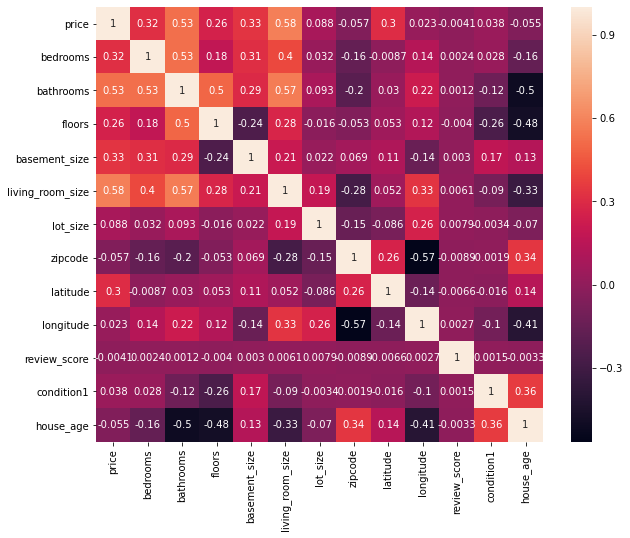

In [64]:
### Check Correlation

fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

## => 'bathrooms', 'living_room_size' are highly positively corelated to 'price' 

In [65]:
df.corr()

,price,bedrooms,bathrooms,floors,basement_size,living_room_size,lot_size,zipcode,latitude,longitude,review_score,condition1,house_age
price,1.000000,0.315279,0.528041,0.256469,0.334542,0.582707,0.087524,-0.057145,0.303502,0.022582,-0.004101,0.038228,-0.055014
bedrooms,0.315279,1.000000,0.527727,0.180175,0.312821,0.402722,0.032374,-0.160195,-0.008686,0.137262,0.002368,0.028183,-0.155735
bathrooms,0.528041,0.527727,1.000000,0.498475,0.291291,0.568835,0.092895,-0.203633,0.029500,0.221941,0.001182,-0.124622,-0.504861
floors,0.256469,0.180175,0.498475,1.000000,-0.242860,0.275800,-0.015844,-0.053411,0.053485,0.119798,-0.004031,-0.256286,-0.484997
basement_size,0.334542,0.312821,0.291291,-0.242860,1.000000,0.207573,0.021676,0.068963,0.107781,-0.140768,0.002962,0.171109,0.129348
living_room_size,0.582707,0.402722,0.568835,0.275800,0.207573,1.000000,0.189605,-0.280765,0.052238,0.334888,0.006078,-0.089823,-0.325168
lot_size,0.087524,0.032374,0.092895,-0.015844,0.021676,0.189605,1.000000,-0.146856,-0.085763,0.257801,0.007916,-0.003445,-0.069599
zipcode,-0.057145,-0.160195,-0.203633,-0.053411,0.068963,-0.280765,-0.146856,1.000000,0.262351,-0.565405,-0.008900,-0.001889,0.341654
latitude,0.303502,-0.008686,0.029500,0.053485,0.107781,0.052238,-0.085763,0.262351,1.000000,-0.136692,-0.006577,-0.016263,0.140964
longitude,0.022582,0.137262,0.221941,0.119798,-0.140768,0.334888,0.257801,-0.565405,-0.136692,1.000000,0.002731,-0.100846,-0.405729


In [66]:
# drop "zipcode" as can use Latitude-Logitude for anlysis on the geographical spread of houses vs price,
# "review_score" has neglible correl with price at -004101

df = df[['price', 'bedrooms', 'bathrooms', 'floors', 'basement_size',
       'living_room_size','lot_size', 'latitude', 'longitude', 
       'condition1','house_age']]
# check if correctly done
df.head()

,price,bedrooms,bathrooms,floors,basement_size,living_room_size,lot_size,latitude,longitude,condition1,house_age
0,221900,3,1.00,1.0,0,1340,5650,47.5112,-122.257,3,59
1,538000,3,2.25,2.0,400,1690,7639,47.7210,-122.319,3,63
2,180000,2,1.00,1.0,0,2720,8062,47.7379,-122.233,3,82
3,604000,4,3.00,1.0,910,1360,5000,47.5208,-122.393,5,49
4,510000,3,2.00,1.0,0,1800,7503,47.6168,-122.045,3,28


In [67]:
df.shape
# 13 -2 ("zipcode", "review_score")

(19688, 11)

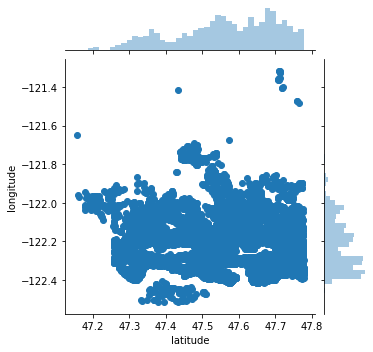

In [68]:
# Visualize Location Characteristics
sns.jointplot(x=df['latitude'], y=df['longitude'], height=5)

In [69]:
## majority of hosue sales is between shaded area (Lat 47.2 to 47.8, Long -121.8 to -122.4)
## within the shaded area high sales between area (Lat 47.5 to 47.8, Long -122 to -122.4)

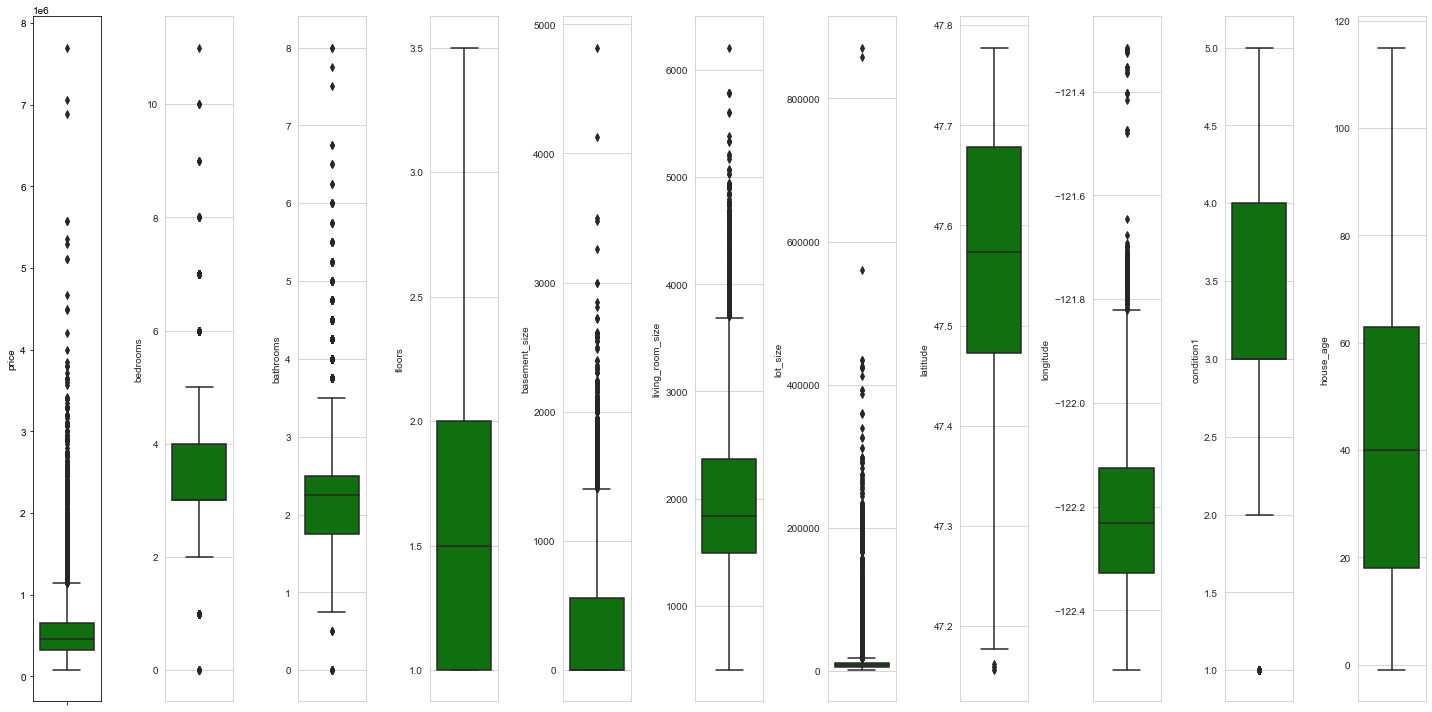

In [70]:
# check Outliers
l = df.columns.values
fig,ax = plt.subplots(1,11,figsize=(20,10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

# => price, bedrooms, bathrooms, basement_size, living_room_size, lot_size, longitude, all had outliers

In [71]:
## need address Outliners for "price", "bedrooms", "bathrooms", "basement_size", "living_room_size", "lot_size", "longitude"

In [72]:
### Outliers in "price"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)
IQR

327000.0

In [73]:
lower_bridge=df['price'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['price'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-658000.0
1631000.0


(None, None)

In [74]:
df.loc[df['price']>=1631000,'price']=1631000 # any beyond upper bridge will be set upper bridge limit

In [75]:
### Outliers in "bedrooms"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.bedrooms.quantile(0.75)-df.bedrooms.quantile(0.25)
IQR

1.0

In [76]:
lower_bridge=df['bedrooms'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['bedrooms'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

0.0
7.0


(None, None)

In [77]:
df.loc[df['bedrooms']>=7,'bedrooms']=7 # any beyond upper bridge will be set upper bridge limit

In [78]:
### Outliers in "bathrooms"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.bathrooms.quantile(0.75)-df.bathrooms.quantile(0.25)
IQR

0.75

In [79]:
lower_bridge=df['bathrooms'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['bathrooms'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-0.5
4.75


(None, None)

In [80]:
df.loc[df['bathrooms']>=4,'bathrooms']=4 # any beyond upper bridge will be set upper bridge limit

In [81]:
### Outliers in "basement_size"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.basement_size.quantile(0.75)-df.basement_size.quantile(0.25)
IQR

560.0

In [82]:
lower_bridge=df['basement_size'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['basement_size'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-1680.0
2240.0


(None, None)

In [83]:
df.loc[df['basement_size']>=2240,'basement_size']=2240 # any beyond upper bridge will be set upper bridge limit

In [84]:
### Outliers in "living_room_size"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.living_room_size.quantile(0.75)-df.living_room_size.quantile(0.25)
IQR

880.0

In [85]:
lower_bridge=df['living_room_size'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['living_room_size'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-1150.0
5010.0


(None, None)

In [86]:
df.loc[df['living_room_size']>=5010,'living_room_size']=5010 # any beyond upper bridge will be set upper bridge limit

In [87]:
### Outliers in "lot_size"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.lot_size.quantile(0.75)-df.lot_size.quantile(0.25)
IQR

4989.5

In [88]:
lower_bridge=df['lot_size'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['lot_size'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-9868.5
25058.0


(None, None)

In [89]:
df.loc[df['lot_size']>=25058,'lot_size']=25058 # any beyond upper bridge will be set upper bridge limit

In [90]:
### Outliers in "longitude"
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.longitude.quantile(0.75)-df.longitude.quantile(0.25)
IQR

0.20299999999998875

In [91]:
lower_bridge=df['longitude'].quantile(0.25)-(IQR*3) #IQR*3 as the distri is skewed (right)
upper_bridge=df['longitude'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-122.93699999999995
-121.51600000000003


(None, None)

In [92]:
df.loc[df['longitude']>=-121,'longitude']=-121 # any beyond upper bridge will be set upper bridge limit

In [93]:
# Check Distribution & Skewness

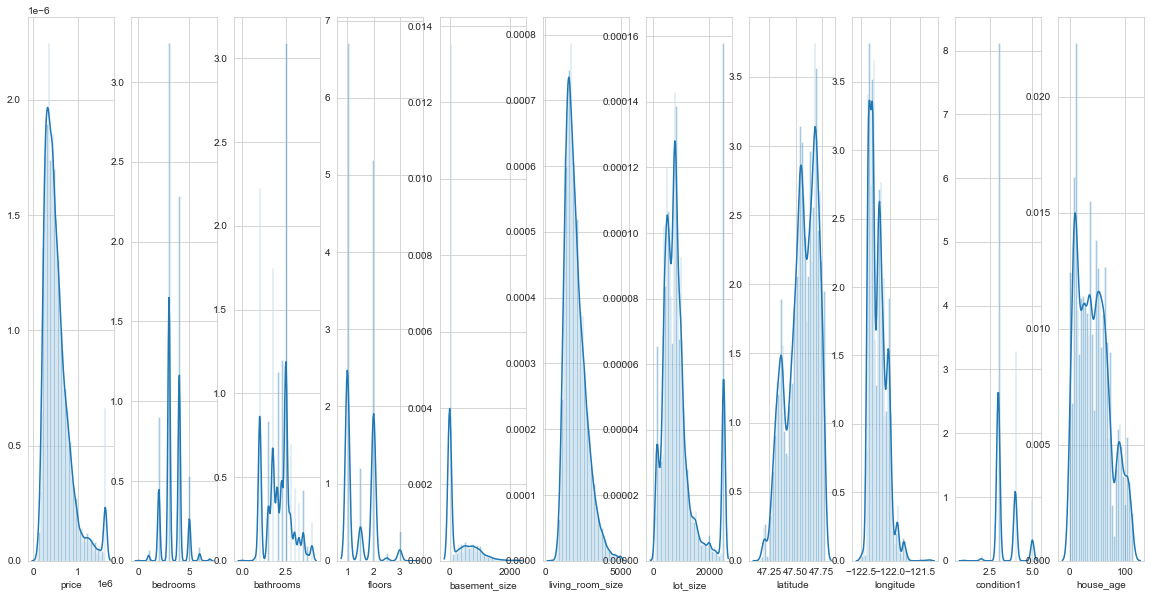

In [94]:
plt.figure(figsize=(20,10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    sns.distplot(df[l[i]],kde=True)
    
# => from Distribution, bathrooms, basement_size, living_room_size, lot_size, longitude, price are right skewed
# => need Scaling i.e. Standardization

In [95]:
# Processing File: Scaling (Standardization-Normalize and center numeric values; i.e. features in diff unit of measures)

In [96]:
# Scaling on all the Independent Variables
from sklearn import datasets, linear_model, preprocessing

names = df[['bedrooms', 'bathrooms', 'floors', 'basement_size',
       'living_room_size','lot_size', 'latitude', 'longitude', 
       'condition1','house_age']].columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df[['bedrooms', 'bathrooms', 'floors', 'basement_size',
       'living_room_size','lot_size', 'latitude', 'longitude', 
       'condition1','house_age']])
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,bedrooms,bathrooms,floors,basement_size,living_room_size,lot_size,latitude,longitude,condition1,house_age
0,-0.412766,-1.493557,-0.916350,-0.662416,-0.947138,-0.555790,-0.362001,-0.306612,-0.627878,0.532542
1,-0.412766,0.193505,0.934209,0.246348,-0.435755,-0.221968,1.156992,-0.746509,-0.627878,0.668683
2,-1.528590,-1.493557,-0.916350,-0.662416,1.069174,-0.150974,1.279351,-0.136329,-0.627878,1.315352
3,0.703057,1.205742,-0.916350,1.405021,-0.917916,-0.664883,-0.292495,-1.271548,2.448311,0.192190
4,-0.412766,-0.143908,-0.916350,-0.662416,-0.275034,-0.244793,0.402563,1.197553,-0.627878,-0.522550


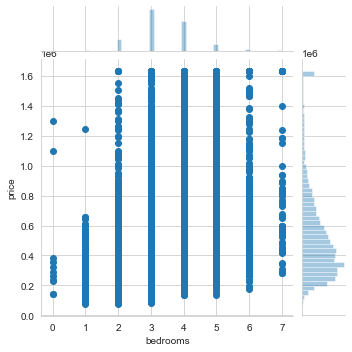

In [98]:
sns.jointplot(x=df['bedrooms'], y=df['price'], height=5)

#=> 0 bedrm sell $0.2m to $0.4m, most sales happen for 2 to 6 bedrms price is widely spread, thus more opportunity 
#=> for negotiation

In [ ]:
# Some Findings from EDA

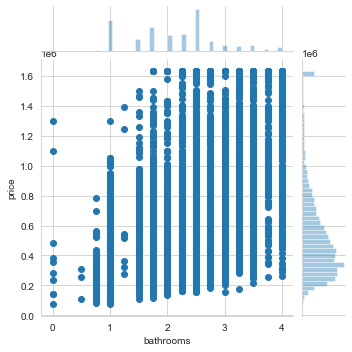

In [99]:
sns.jointplot(x=df['bathrooms'], y=df['price'], height=5)

#=> 2 or more bathrm hse min price is higher, esp 4 bathrm min is abt $0.25M

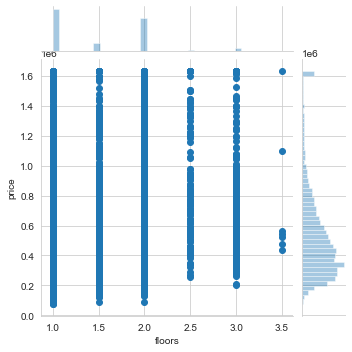

In [100]:
sns.jointplot(x=df['floors'], y=df['price'], height=5)

#=> 1 to 2 flr hse min price is almost same, 2.5 to 3had higher min price, 3.5 had higher price but lesser transactions 

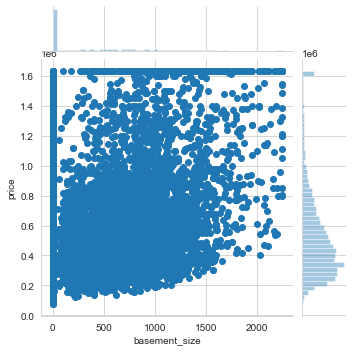

In [101]:
sns.jointplot(x=df['basement_size'], y=df['price'], height=5)

#=> most sales happened for basement below 1000sft, above 1000sft command higher min price

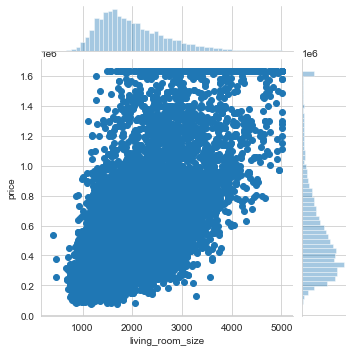

In [102]:
sns.jointplot(x=df['living_room_size'], y=df['price'], height=5)

#=> most optimal sales shd be hse with livrm btw 2000 to 4000 sft as transactions is high & price is higher too

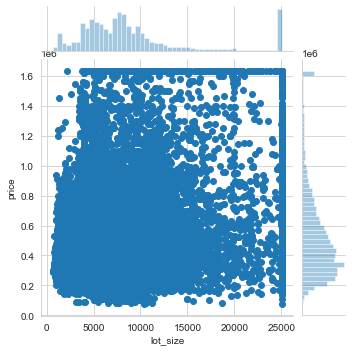

In [103]:
sns.jointplot(x=df['lot_size'], y=df['price'], height=5)

#=> Lot-size btw 10000 to 15000sft had higher min price & high transactions vol

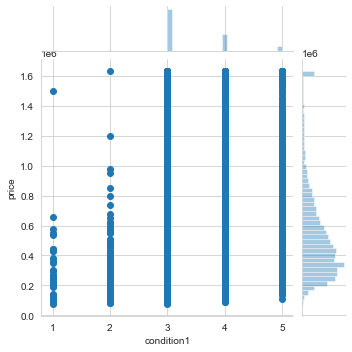

In [104]:
sns.jointplot(x=df['condition1'], y=df['price'], height=5)

#=> Hse Condition doesn't seem to give better min price

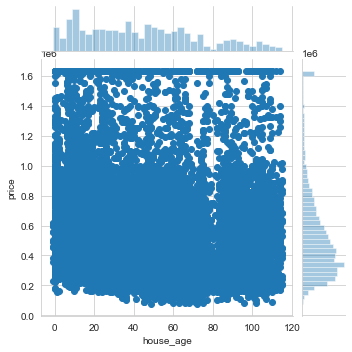

In [105]:
sns.jointplot(x=df['house_age'], y=df['price'], height=5)

#=> Hse age, seem the older hse is not affected, thus agent can tgt and reno such old hse to sell

In [97]:
df.to_csv('EDA_forML.csv',index=False)